In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(42)   ## so that output would be same

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Abhayparashar31/Diabetes-prediction/master/diabetes.csv")

In [4]:
#remove warning
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
#understand data
print(data.shape)
print(data.ndim)
print(data.size)  
print(data.isna().sum())  
print(data.info())

(767, 9)
2
6903
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    

([<matplotlib.axis.XTick at 0x1a1ae68a50>,
 <a list of 2 Text xticklabel objects>)

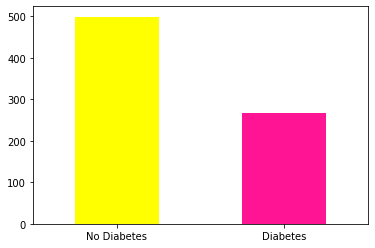

In [9]:
data["Outcome"].value_counts().plot(kind="bar",color=["blue","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0)

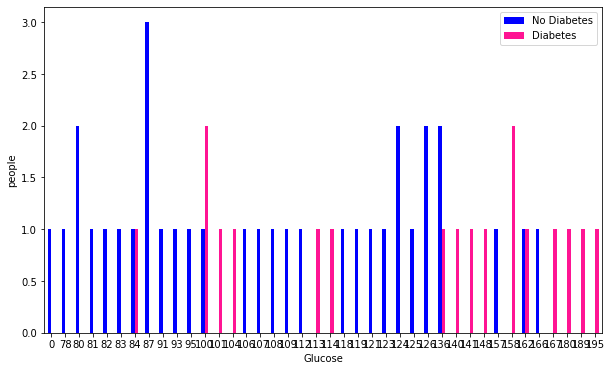

In [10]:
# glucose vs outcome
pd.crosstab(data.Glucose[::15],data.Outcome).plot(kind="bar",figsize=(10,6),color=["blue","deeppink"])
plt.ylabel("people");plt.legend(['No Diabetes', 'Diabetes']);plt.xticks(rotation=0);

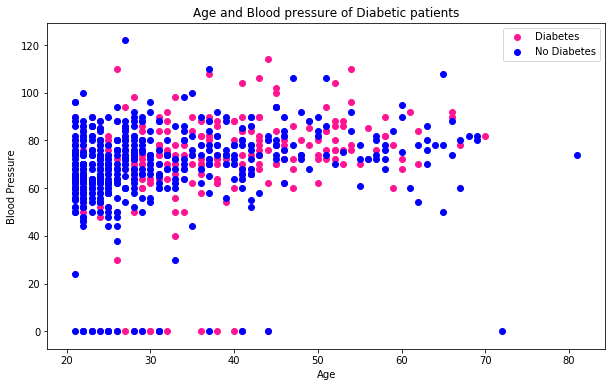

In [11]:
#age vs diabetes, bp vs diabetes

plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="deeppink");
# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="blue");

plt.title("Age and Blood pressure of Diabetic patients")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

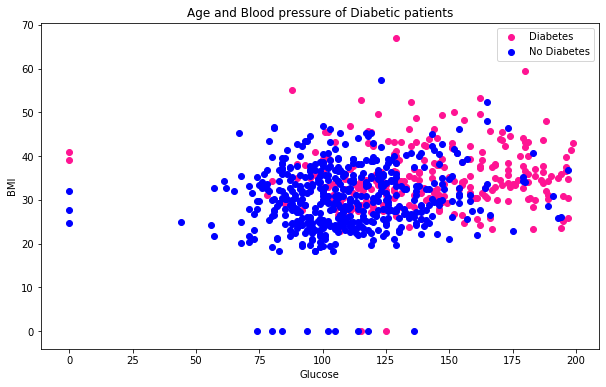

In [24]:
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(data.Glucose[data.Outcome==1],data.BMI[data.Outcome==1],c="deeppink");
# Scatter with negative example
plt.scatter(data.Glucose[data.Outcome==0],data.BMI[data.Outcome==0],c="blue");

plt.title("Age and Blood pressure of Diabetic patients")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(["Diabetes","No Diabetes"]);

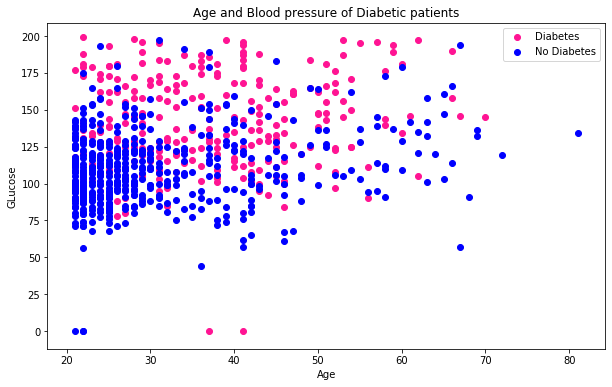

In [12]:
# age and glucose
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.Glucose[data.Outcome==1],c="deeppink");
# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.Glucose[data.Outcome==0],c="blue");

plt.title("Age and Blood pressure of Diabetic patients")
plt.xlabel("Age")
plt.ylabel("GLucose")
plt.legend(["Diabetes","No Diabetes"]);

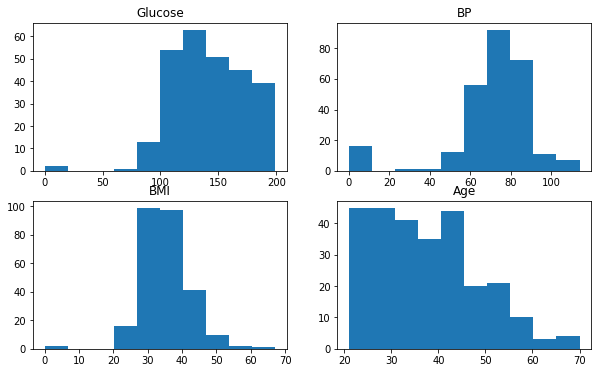

In [37]:
#compare all parameters with people with diabetes
figure, axis = plt.subplots(nrows=2,ncols=2,figsize=(10,6))
axis[0,0].set_title('Glucose')
axis[0,0].hist(data.Glucose[data.Outcome==1])
axis[0,1].set_title("BP")
axis[0,1].hist(data.BloodPressure[data.Outcome==1]);
axis[1,0].set_title("BMI")
axis[1,0].hist(data.BMI[data.Outcome==1]);
axis[1,1].set_title("Age")
axis[1,1].hist(data.Age[data.Outcome==1]);


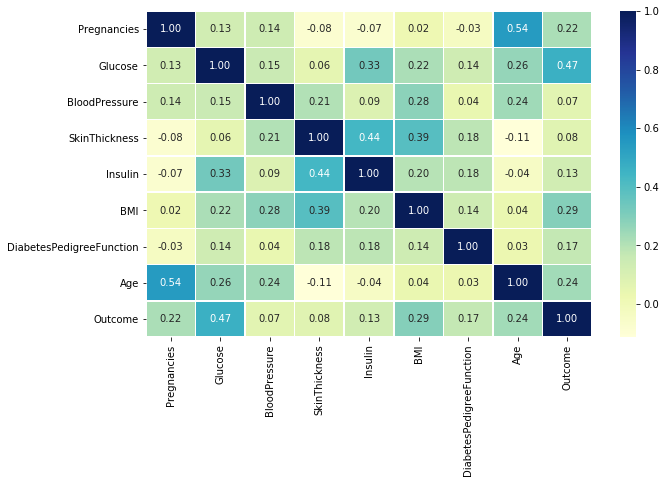

In [14]:
#correleation matrix
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")

In [15]:
#Now we will train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [17]:
#train test split
data.sample(frac=1)
#Spliting the data
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [18]:
#logistic regression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
log_reg = log_reg.score(X_test,y_test)

#KNN
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
knn = knn.score(X_test,y_test)

#Random forest classifier
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
clf = clf.score(X_test,y_test)

#SVM
svm = SVC()
svm.fit(X_train,y_train)
svm = svm.score(X_test,y_test)

In [19]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
"KNN":knn,
"Random Forest Classifier":clf,
"Support Vector Machine":svm},
index=["accuracy"])

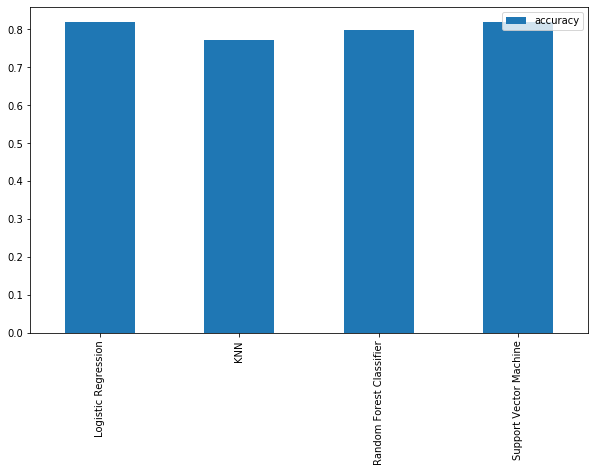

In [22]:
#compare model
model_compare.T.plot.bar(figsize=(10,6));
#we can see below that logistic regression and support vector machine are the most accurate, 
#to improve accuracy we will ues hyperparameters

In [56]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}
# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
score = rs_log_reg.score(X_test,y_test)
print(score*100)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


83.11688311688312


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [57]:
log_reg_grid = {'C': np.logspace(-4,4,30),
"solver":["liblinear"]}
#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                           verbose=True)
#fit grid search cv
gs_log_reg.fit(X_train,y_train)
score = gs_log_reg.score(X_test,y_test)
print(score*100)
########OUTPUT#########
83.76623376623377

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


83.76623376623377


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


83.76623376623377

In [58]:
#evaluating model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

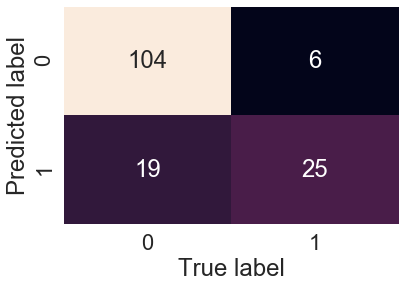

In [62]:
#confusion matrix
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [65]:
#accruacy score
print(accuracy_score(y_test,y_pred))

NameError: name 'accuracy_score' is not defined

In [66]:
#classifciation report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       110
           1       0.81      0.57      0.67        44

    accuracy                           0.84       154
   macro avg       0.83      0.76      0.78       154
weighted avg       0.83      0.84      0.83       154



In [67]:
import pickle
# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetes.pkl", "wb"))
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.8376623376623377